In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import os
import ast

dataset = load_dataset("csv",data_files=os.path.join(os.path.abspath(os.path.join(os.getcwd(),"..")),"data_jobs.csv"))
df = dataset['train'].to_pandas()

df["job_posted_date"]= pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x)if pd.notna(x) else x)

<Axes: xlabel='job_title_short'>

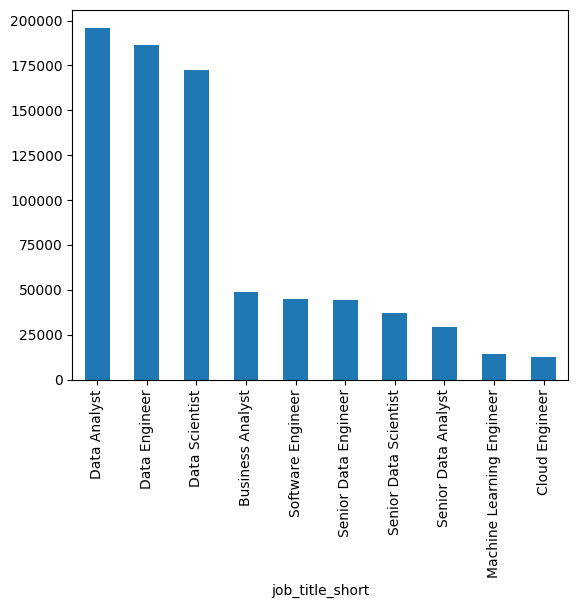

In [11]:

fig,ax = plt.subplots()

df["job_title_short"].value_counts().plot(kind ="bar",ax = ax)

In [12]:
df.job_schedule_type.value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

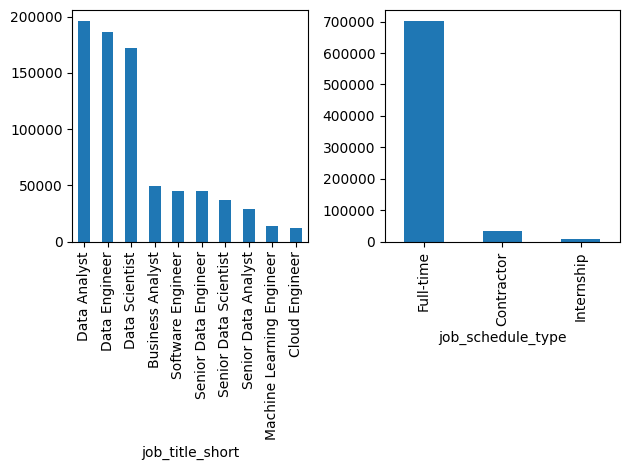

In [14]:
fig,ax = plt.subplots(1,2)



df["job_title_short"].value_counts().plot(kind ="bar",ax = ax[0])
df.job_schedule_type.value_counts().head(3).plot(kind = "bar" ,ax = ax[1])

fig.tight_layout()

In [15]:
df_exploded = df.explode("job_skills")
skills_count = df_exploded.groupby(["job_skills","job_title_short"]).agg("size")
df_skills_count = skills_count.reset_index(name = "skill_count")
df_skills_count = df_skills_count.sort_values(by = "skill_count",ascending= False)





In [16]:
df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
293,codecommit,Business Analyst,1
2233,xamarin,Machine Learning Engineer,1
1087,mlr,Machine Learning Engineer,1


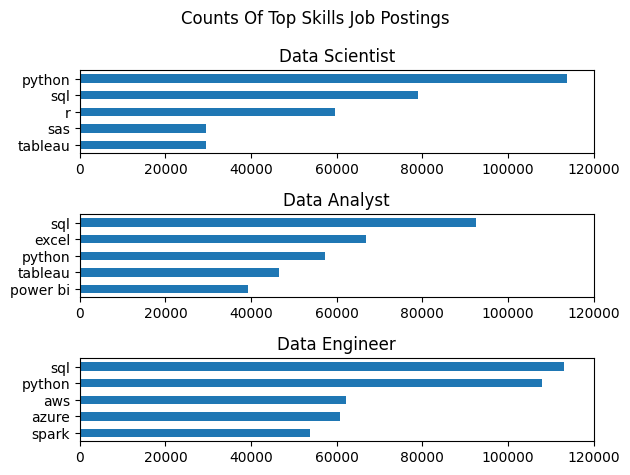

In [30]:
fig,ax = plt.subplots(3,1)

job_titles = ["Data Scientist","Data Analyst" , "Data Engineer"]

for i,job_title in enumerate(job_titles):
   df_plot = df_skills_count[df_skills_count["job_title_short"] == job_title].head(5)
   df_plot.plot(kind ="barh",x ="job_skills",y = "skill_count",ax= ax[i],title= job_title)
   ax[i].invert_yaxis()
   ax[i].set_ylabel("")
   ax[i].legend().set_visible(False)
   ax[i].set_xlim(0,120000)

fig.suptitle("Counts Of Top Skills Job Postings")

fig.tight_layout()